# Street Tree Census Data

### Brief Information about the features that we have in our dataset
* **tree_id** :   Unique identification number for each tree point.
* **block_id**:   Identifier linking each tree to the block in the blockface table/shapefile that it is mapped on.
* **created_at**: The date tree points were collected in the census software.
* **tree_dbh** :  Diameter of the tree, measured at approximately 54"/137cm above the ground. Data was collected for both                     living and dead trees.
* **stump_diam**: Diameter of stump measured through the center, rounded to the nearest inch.
* **curb_loc** :  Location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the               curb (OffsetFromCurb)
* **status**:     Indicates whether the tree is alive, standing dead, or a stump.
* **health**:     Indicates the user's perception of tree health.
* **spc_latin**:  Its the scientific name for tree species, e.g. "Acer rubrum"
* **spc_common**: Common name that is used for tree species, e.g. "red maple"
* **steward**:    Indicates the number of unique signs of stewardship observed for this tree. Not recorded for stumps or dead                 trees.
* **guards**:     Indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Not recorded                 for dead trees and stumps.
* **sidewalk**: Indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged,cracked or lifted.               Not recorded for dead trees 
* **user_type**:  This field describes the category of user who collected this tree point's data.
* **root_stone**:     Indicates the presence of a root problem caused by paving stones in tree bed
* **root_grate**: Indicates the presence of a root problem caused by metal grates in tree bed.
* **root_other**: Indicates the presence of other root problems
* **trunk_wire**: Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk
* **trnk_light**:Indicates the presence of a trunk problem caused by lighting installed on the tree
* **trnk_other**: Indicates the presence of other trunk problems
* **brch_light**: Indicates the presence of a branch problem caused by lights (usually string lights) or wires in the branches
* **brch_shoe**: Indicates the presence of a branch problem caused by sneakers in the branches
* **brch_other**: Indicates the presence of other branch problems
* **address**:Nearest estimated address to tree
* **postcode**: Five-digit zipcode in which tree is located
* **zip_city** : Zip code of the city
* **Communiting Board**: The community board in which the tree is present
* **borcode**: The location code in which tree is located: 1-Manhanttan,2-Bronx,3-Brooklyn,4-Queens,5-Staten Island
* **borrough** : The location name
* **cncldist** : The Council District in which the tree is present
* **st_assem** : State Assembly District in which the tree is located
* **state** : All feautres are given value as New Yorl
* **latitue,longitude** : Location in degrees
* **x_sp** : X coordinate in the state plane
* **y_sp** : Y coordinate in the state plane

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("2015_Street_Tree_Census_-_Tree_Data.csv")
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [3]:
data.shape

(683788, 45)

In [4]:
len(data)

683788

In [5]:
data.isnull().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

**Missing Data**

* columns :**health,spc_latin,spc_common,steward,guards,sidewalk,problems** -> have almost **32k missing data points**.
* columns : **council district,census tract** -> have **6519 missing data point**s.
* columns : **bin and bbl** -> have **9559 data points missing**
    

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

To view all the columns that are present in our dataset

In [7]:
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [8]:
data.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


### As we are doing analysis on Health of the Trees so the location doesn't really matter. So we are going to drop some of the columns that have information about the location and only keep the data that is valid for analyzing the health of trees.

In [9]:
data.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

### Making a subset of data by droping location columns and other columns that are not useful

In [10]:
tree_data = data[['tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'steward',
       'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_data.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [11]:
tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tree_id     683788 non-null  int64 
 1   tree_dbh    683788 non-null  int64 
 2   stump_diam  683788 non-null  int64 
 3   curb_loc    683788 non-null  object
 4   status      683788 non-null  object
 5   health      652172 non-null  object
 6   spc_latin   652169 non-null  object
 7   steward     652173 non-null  object
 8   sidewalk    652172 non-null  object
 9   problems    652124 non-null  object
 10  root_stone  683788 non-null  object
 11  root_grate  683788 non-null  object
 12  root_other  683788 non-null  object
 13  trunk_wire  683788 non-null  object
 14  trnk_light  683788 non-null  object
 15  trnk_other  683788 non-null  object
 16  brch_light  683788 non-null  object
 17  brch_shoe   683788 non-null  object
 18  brch_other  683788 non-null  object
dtypes: int64(3), object(16)

In [12]:
tree_data.shape

(683788, 19)

In [13]:
tree_data.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

#### After droping some of the columns we still have Missing data is few columns 

In [14]:
tree_data[tree_data["health"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [15]:
tree_data.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


## Numerical Data Exploration and Checking For Outliers

#### Checking how many points are there In Tree_DBH after 3 Quantile

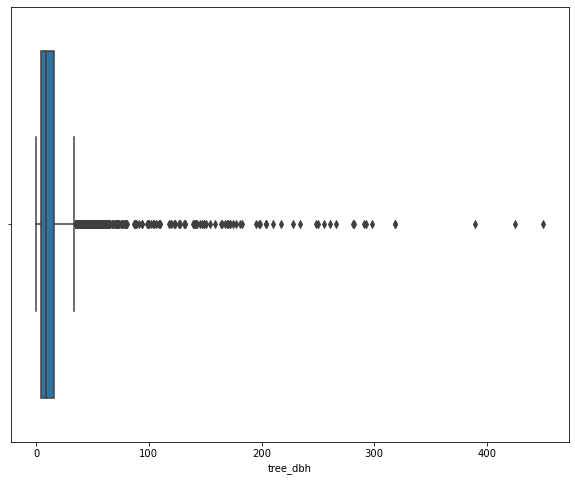

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(tree_data["tree_dbh"]);


#### Checkin Stump Diameters spread

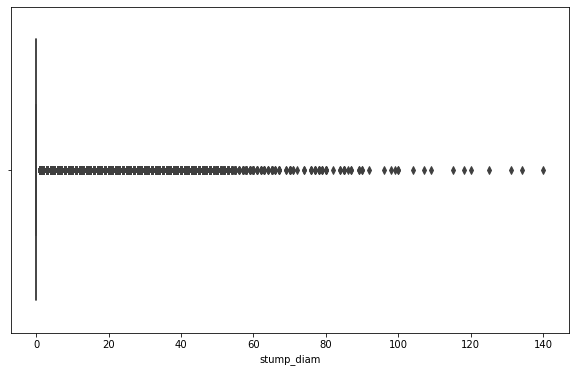

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(tree_data["stump_diam"]);

### Plotting Histogram

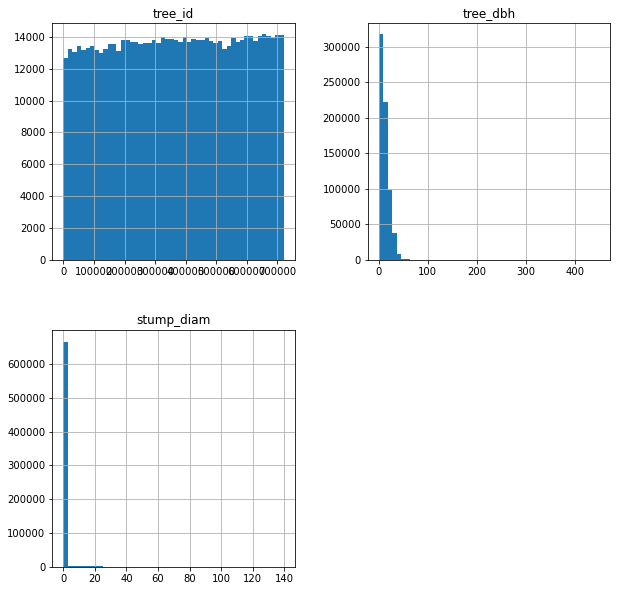

In [18]:
tree_data.hist(bins=50,figsize=(10,10));

#### We Can see that our Data is Right Skewed

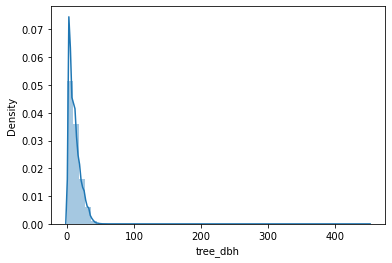

In [19]:
sns.distplot(tree_data["tree_dbh"],bins=50);

### Scatter Plot for all Trees

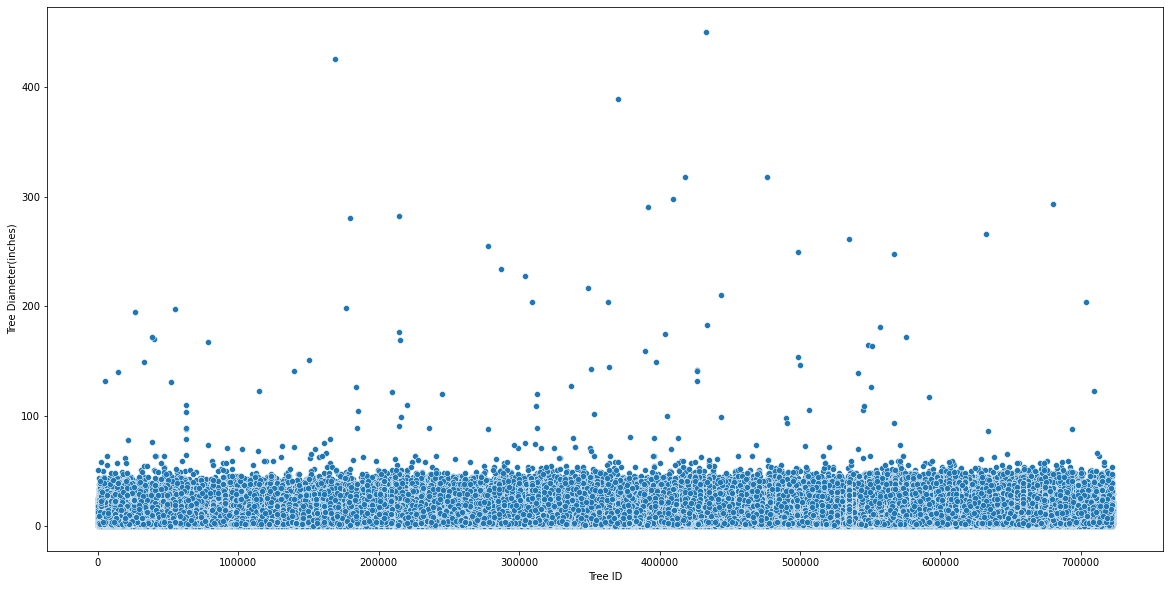

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(tree_data["tree_id"],tree_data["tree_dbh"])
plt.xlabel("Tree ID")
plt.ylabel("Tree Diameter(inches)");

### Insights on the scatter plot

* Tree above 100inches diameter: 70
* Tree above 200inches diameter: 22
* Tree above 300inches diameter: 5   ---> can be thought of as outliers
* Tree above 400inches diameter: 2   ---> can be thought of as outliers

In [21]:
print(len(tree_data[tree_data["tree_dbh"] > 100]))
print(len(tree_data[tree_data["tree_dbh"]>200]))
print(len(tree_data[tree_data["tree_dbh"]>300]))
print(len(tree_data[tree_data["tree_dbh"]>400]))
print(np.median(tree_data["tree_dbh"]))
print(np.mean(tree_data["tree_dbh"]))

70
22
5
2
9.0
11.27978701000895


In [22]:
big_trees = tree_data[tree_data["tree_dbh"]>50]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


### Plotting For Big Trees

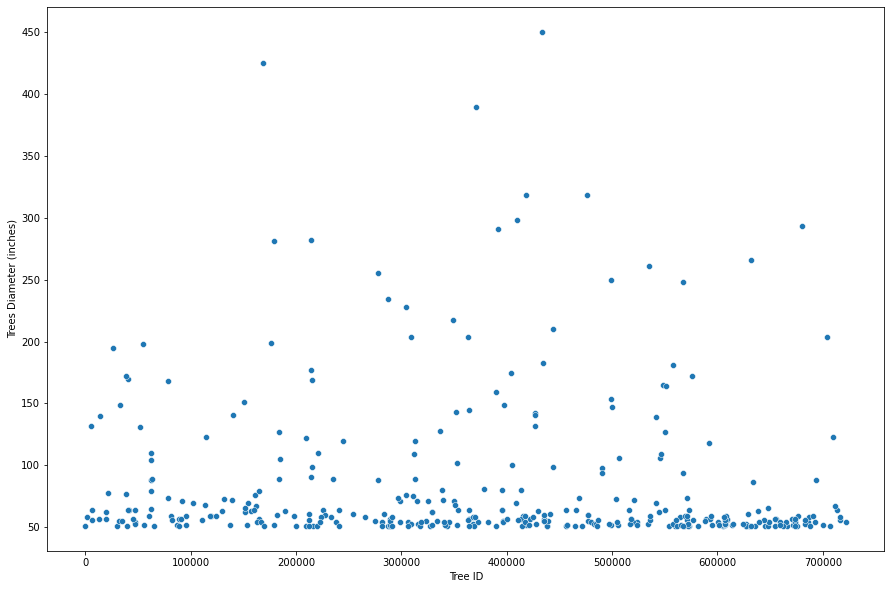

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=big_trees["tree_id"],y=big_trees["tree_dbh"])
plt.xlabel("Tree ID")
plt.ylabel("Trees Diameter (inches)");

In [24]:
big_stump = tree_data[tree_data["stump_diam"]>50]
big_stump

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
6122,200925,0,52,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6177,200924,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
9872,192215,0,53,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645994,135904,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646336,151125,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
649174,154188,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
652690,154181,0,60,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


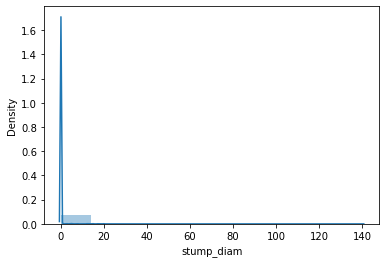

In [25]:
sns.distplot(tree_data["stump_diam"],bins=10);

## Scatter Plot for all Trees (Stump Diameter)

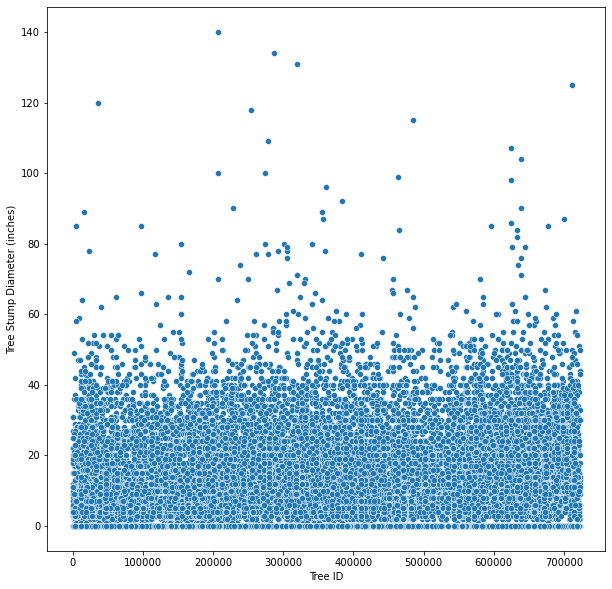

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(tree_data["tree_id"],tree_data["stump_diam"])
plt.xlabel("Tree ID")
plt.ylabel("Tree Stump Diameter (inches)");

### Insights on Tree Stump Diameter
* Trees with stum diameter above 60 : 92
* Trees with stump diameter above 100 : 10
* Trees with stump diameter above 120: 4

In [27]:
print(len(tree_data[tree_data["stump_diam"]> 60]))
print(len(tree_data[tree_data["stump_diam"]> 100]))
print(len(tree_data[tree_data["stump_diam"]> 120]))
# print(np.median(tree_data["stump_diam"]))

92
10
4


#### Plotting Big Stump Trees

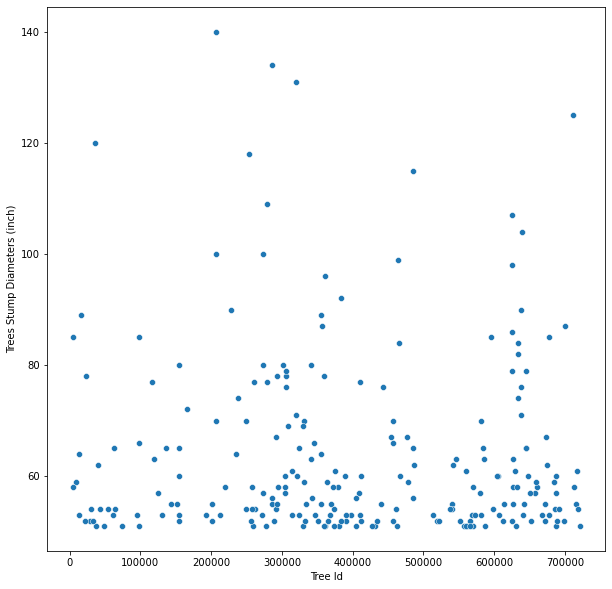

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(big_stump["tree_id"],y=big_stump["stump_diam"])
plt.xlabel("Tree Id")
plt.ylabel("Trees Stump Diameters (inch)");

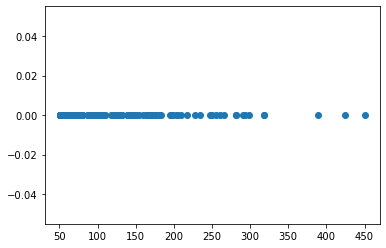

In [29]:
plt.scatter(big_trees["tree_dbh"],big_trees["stump_diam"]);

## Categorical Data Exploration

In [30]:
tree_data.head(2)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


#### Which tree appears the most in our dataset

In [31]:
tree_data["spc_latin"].value_counts()

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 132, dtype: int64

As we can see **Platanus x Acerifolia** is the tree that appears the most, followed by **Gleditsia triacanthos var. inermis** and others.

In [32]:
tree_names = pd.DataFrame(tree_data["spc_latin"].value_counts())

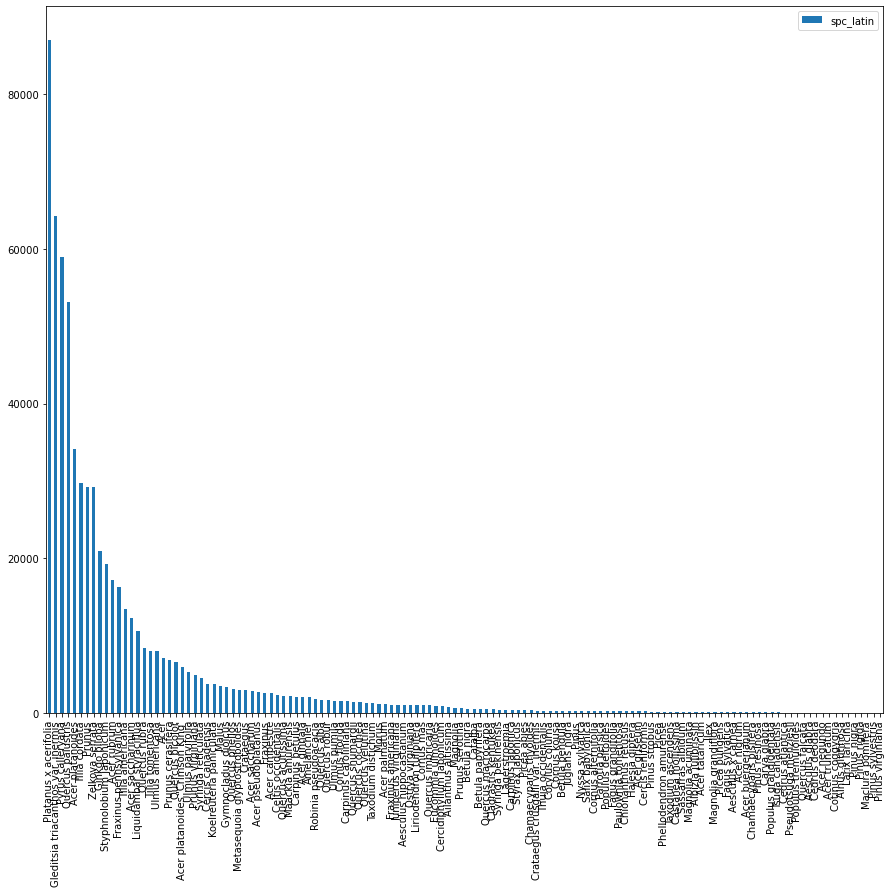

In [33]:
tree_names.plot(kind="bar",figsize=(15,13));

In [34]:
tree_data["status"].value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

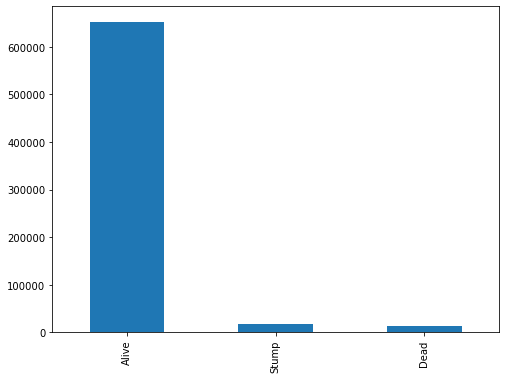

In [35]:
tree_data["status"].value_counts().plot(kind="bar",figsize=(8,6));

In [36]:
tree_data["health"].value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [37]:
tree_data["steward"].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [38]:
tree_data["sidewalk"].value_counts()

NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64

In [39]:
tree_data["curb_loc"].value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

In [40]:
tree_data["problems"].value_counts()

None                                                                          426280
Stones                                                                         95673
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
RootOther                                                                      11418
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
MetalGrates,RootOther,WiresRope,TrunkLights,BranchLights,BranchOther               1
MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther                         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: problems, Length: 232, dtype: int64

#### Plot for Problems that are causing damage to the Trees.

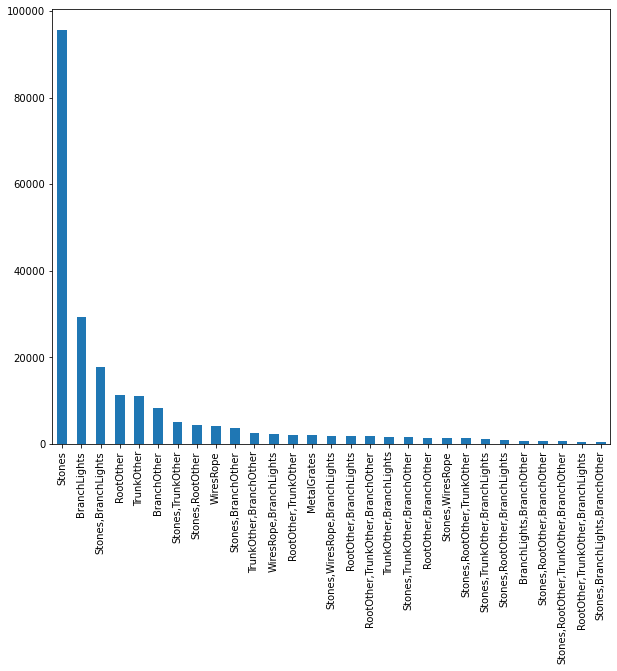

In [41]:
tree_data["problems"].value_counts()[1:30].plot(kind="bar",figsize=(10,8));

In [42]:
tree_data.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [43]:
stumps_data = tree_data[tree_data["status"] == "Stump"]
stumps_data

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [44]:
dead_data = tree_data[tree_data["status"] == "Dead"]
dead_data

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


**Observation**:

So from the above data we can see that the Tree Steward (Person Incharge of Collecting tree data) did not collect the data 
for Trees that are not alive, that's the reason we have missing data for ["Health","Tree_Species","Problems","Sidewalk"].

In [45]:
tree_data.columns

Index(['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health',
       'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other'],
      dtype='object')

In [46]:
binary_data = tree_data[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]

In [47]:
tree_data["root_stone"].value_counts()

No     543789
Yes    139999
Name: root_stone, dtype: int64

In [48]:
# Calculating value counts for all the binary data all at once
binary_data.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


We can see that most of the problem is caused by **Root Stones**

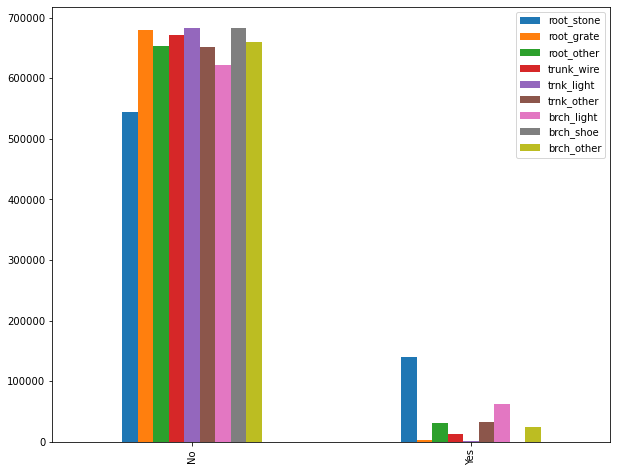

In [49]:
binary_data.apply(pd.Series.value_counts).plot(kind="bar",figsize=(10,8));

## Filling Nan values

In [54]:
## here we select status column and fill it with not applicable for dead  and stump trees
mask = ((tree_data["status"] ==  "Stump" ) | (tree_data["status"] == "Dead"))

In [66]:
tree_data[tree_data["status"] == "Dead"]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [55]:
tree_data.loc[mask]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [56]:
tree_data.loc[mask]  = tree_data.loc[mask].fillna('Not Applicable')

In [75]:
tree_data.loc[mask]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [76]:
tree_data.isna().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

There are still some missing values

In [77]:
tree_data[tree_data["health"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


In [78]:
tree_data[tree_data["problems"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
120289,332668,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121488,332669,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121685,332670,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133470,332693,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133812,332692,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
134820,332694,28,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
144137,332947,3,0,OnCurb,Alive,Good,Ginkgo biloba,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
145324,332543,9,0,OnCurb,Alive,Good,Prunus,None,Damage,NaN,No,No,No,No,No,No,No,No,No
145337,332541,8,0,OnCurb,Alive,Good,Prunus,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
146314,332542,8,0,OnCurb,Alive,Good,Prunus,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No


In [79]:
tree_data[tree_data["sidewalk"].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
346299,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NaN,None,No,No,No,No,No,No,No,No,No


* As we can see that all the missing values in problems column are for Alive trees so we replace that value with "None".
* There is only 1 missing value for sidewalk so we fill it with the most observed value in that column.
* The health column also has only 1 missing value after looking at that missing value we cans see that it is for Alive tree so we replace it with "Good".
* The spc_latin that tells us the species of the trees is missing for few trees, so we just replace those values with no observations.

In [80]:
## Filling the remaining Values
tree_data["problems"].fillna("None",inplace=True)
tree_data["sidewalk"].fillna("NoDamage",inplace=True)
tree_data["health"].fillna("Good",inplace=True)
tree_data["spc_latin"].fillna("No Observations",inplace=True)

In [81]:
tree_data.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

#### Fixing Outlier

In [87]:
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


In [95]:
trail_trees = tree_data[(tree_data["tree_dbh"] > 60) | (tree_data["stump_diam"] > 60)]
trail_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,None,NoDamage,None,No,No,No,No,No,No,No,No,No
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


### Now taking only data for trees that have tree_dbh <= 60 and stump_diam <=60

In [97]:
tree_data_subset = tree_data[(tree_data["tree_dbh"]<=60) & (tree_data["stump_diam"]<=60)]
tree_data_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [98]:
tree_data_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683543.000000,683543.000000,683543.000000
mean,365210.979198,11.256035,0.421943
std,208126.123971,8.480745,3.154152
min,3.000000,0.000000,0.000000
25%,186582.500000,4.000000,0.000000
50%,366231.000000,9.000000,0.000000
75%,546182.500000,16.000000,0.000000
max,722694.000000,60.000000,60.000000


### Seperating Alive and Dead trees because we can see that the obsevation of stump for alive trees is "0"

In [106]:
tree_data_subset_alive = tree_data_subset[tree_data_subset["status"] == "Alive"]
tree_data_subset_dead = tree_data_subset[(tree_data_subset["status"] == "Dead") | (tree_data_subset["status"] == "Stump")]

In [107]:
tree_data_subset[tree_data["status"] == "Dead"]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [108]:
tree_data_subset_dead

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


 #### Getting mean,max,min values for each tree

In [109]:
tree_data_subset_alive.groupby("spc_latin").mean()

,tree_id,tree_dbh,stump_diam
spc_latin,,,
Acer,473760.032486,11.675424,0.0
Acer buergerianum,395036.818182,8.090909,0.0
Acer campestre,383928.187917,7.103962,0.0
Acer ginnala,370801.015129,7.869204,0.0
Acer griseum,347632.222727,3.509091,0.0
...,...,...,...
Tsuga canadensis,268551.181818,5.193182,0.0
Ulmus americana,308764.589313,11.933768,0.0
Ulmus parvifolia,303404.453219,7.396894,0.0


In [124]:
tree_data_subset[["tree_dbh","stump_diam"]]

,tree_dbh,stump_diam
0,3,0
1,21,0
2,3,0
3,10,0
4,21,0
...,...,...
683783,25,0
683784,7,0
683785,12,0
683786,9,0


In [132]:
tree_data_subset_alive["tree_id"] = tree_data_subset_alive["tree_id"].astype(str)

In [136]:
tree_data_subset_alive.groupby("spc_latin")["tree_dbh"].describe()

,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2549.0,7.103962,4.293100,0.0,4.0,6.0,9.0,35.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,88.0,5.193182,3.959153,0.0,2.0,3.5,7.0,21.0
Ulmus americana,7972.0,11.933768,9.374470,0.0,4.0,9.0,17.0,58.0
Ulmus parvifolia,5344.0,7.396894,5.669532,0.0,3.0,5.0,10.0,53.0


* We can still se that some values are for tree_dbh = 0 for trees so this can be an error so we can remove that
* we can say that values that are above 3 quantile (75%) we can remove those as those values are too big 


In [152]:
alive_stats = tree_data_subset.groupby("spc_latin")["tree_dbh"].describe().reset_index()[["spc_latin","25%","75%"]]
alive_stats

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
129,Tsuga canadensis,2.0,7.0
130,Ulmus americana,4.0,17.0
131,Ulmus parvifolia,3.0,10.0
132,Ulmus pumila,4.0,17.0


In [153]:
tree_data_subset_alive = tree_data_subset_alive.merge(alive_stats, on="spc_latin",how="left")

In [155]:
tree_data_subset_alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0


#### Now filter our data select only trees above 1st quantile and below 3quantile

In [159]:
filter_data_25 = tree_data_subset_alive["tree_dbh"]< tree_data_subset_alive["25%"]

## this changes the values of that specific tree as the 25% value if that trees dbh value is less than 25%
tree_data_subset_alive.loc[filter_data_25,"tree_dbh"] = tree_data_subset_alive["25%"]  

filter_data_75 = tree_data_subset_alive["tree_dbh"]> tree_data_subset_alive["75%"]
## this changes the values of that specific tree as the 75% value if that trees dbh value is more than 75%
tree_data_subset_alive.loc[filter_data_75,"tree_dbh"] = tree_data_subset_alive["75%"]

In [160]:
tree_data_subset_alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,5.0,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21.0,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,12.0,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,24.0,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,5.0,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12.0,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9.0,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0


In [161]:
tree_data_subset_alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,5.0,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21.0,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,12.0,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,24.0,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,5.0,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12.0,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9.0,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0


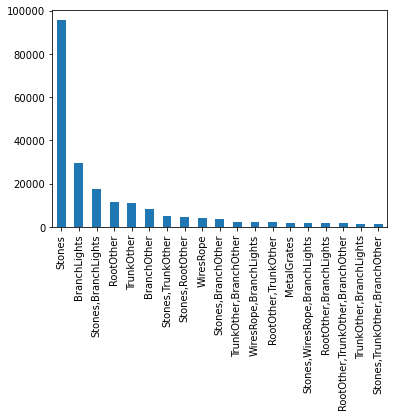

In [167]:
tree_data_subset_alive["problems"].value_counts()[1:20].plot(kind="bar");